[[48  4]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80


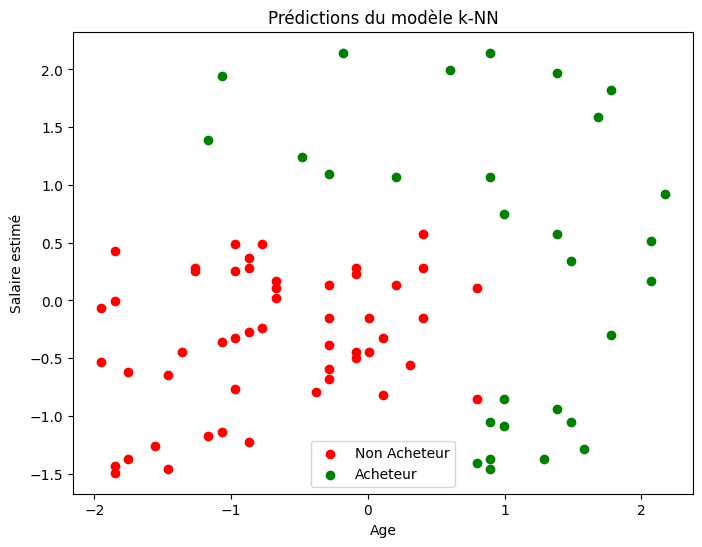

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Chargement des données
data = pd.read_csv("Social_Network_Ads.csv")

# Séparation des variables indépendantes (X) et dépendantes (y)
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des fonctionnalités
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle k-NN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Prédiction des résultats
y_pred = classifier.predict(X_test)

# Évaluation du modèle
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='red', label='Non Acheteur')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='green', label='Acheteur')
plt.xlabel('Age')
plt.ylabel('Salaire estimé')
plt.legend()
plt.title('Prédictions du modèle k-NN')
plt.show()
